Index(['Afghanistan', '5', '1', '648', '16', '10', '2', '0', '3', '5.1', '1.1',
       '1.2', '0.1', '1.3', '1.4', '1.5', '0.2', 'green', '0.3', '0.4', '0.5',
       '0.6', '1.6', '0.7', '0.8', '1.7', '0.9', '0.10', 'black', 'green.1'],
      dtype='object')
(193, 30)
  Afghanistan  5  1   648  16  10  2  0  3  5.1  ...  0.5  0.6  1.6  0.7  0.8  \
0     Albania  3  1    29   3   6  6  0  0    3  ...    0    0    1    0    0   
1     Algeria  4  1  2388  20   8  2  2  0    3  ...    0    0    1    1    0   

   1.7  0.9 0.10  black  green.1  
0    0    1    0    red      red  
1    0    0    0  green    white  

[2 rows x 30 columns]
[[  0   3   1 ...   0   5   6]
 [  1   4   1 ...   0   3   7]
 [  2   6   3 ...   0   1   6]
 ...
 [190   4   2 ...   0   3   4]
 [191   4   2 ...   0   3   2]
 [192   4   2 ...   0   3   4]]
[6 2 1 0 5 1 1 0 0 1 0 1 2 2 1 0 1 5 1 3 0 5 0 1 2 6 5 3 5 1 1 0 1 5 5 0 6
 0 2 5 1 0 6 1 6 1 2 1 0 0 2 0 5 1 1 1 1 1 0 0 0 5 5 6 1 5 1 1 1 1 1 0 2 5
 4 0 0 3 6 1 4 2 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


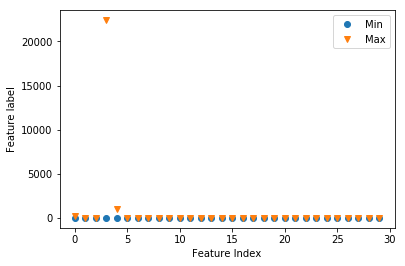

In [85]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors,model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt

%matplotlib inline




# 1. TItle: Flag database

# 2. Source Information
#    -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
#       Collins Publishers (1986).
#    -- Donor: Richard S. Forsyth 
#              8 Grosvenor Avenue
#              Mapperley Park
#              Nottingham NG3 5DX
#              0602-621676
#    -- Date: 5/15/1990

# 3. Past Usage:
#    -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

# 4. Relevant Information:
#    -- This data file contains details of various nations and their flags.
#       In this file the fields are separated by spaces (not commas).  With
#       this data you can try things like predicting the religion of a country
#       from its size and the colours in its flag.  
#    -- 10 attributes are numeric-valued.  The remainder are either Boolean-
#       or nominal-valued.

# 5. Number of Instances: 194

# 6. Number of attributes: 30 (overall)

# 7. Attribute Information:
#    1. name	Name of the country concerned
#    2. landmass	1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
#    3. zone	Geographic quadrant, based on Greenwich and the Equator
#                 1=NE, 2=SE, 3=SW, 4=NW
#    4. area	in thousands of square km
#    5. population	in round millions
#    6. language 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other 
#                Indo-European, 7=Chinese, 8=Arabic, 
#                9=Japanese/Turkish/Finnish/Magyar, 10=Others
#    7. religion 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
#                5=Ethnic, 6=Marxist, 7=Others
#    8. bars     Number of vertical bars in the flag
#    9. stripes  Number of horizontal stripes in the flag
#   10. colours  Number of different colours in the flag
#   11. red      0 if red absent, 1 if red present in the flag
#   12. green    same for green
#   13. blue     same for blue
#   14. gold     same for gold (also yellow)
#   15. white    same for white
#   16. black    same for black
#   17. orange   same for orange (also brown)
#   18. mainhue  predominant colour in the flag (tie-breaks decided by taking
#                the topmost hue, if that fails then the most central hue,
#                and if that fails the leftmost hue)
#   19. circles  Number of circles in the flag
#   20. crosses  Number of (upright) crosses
#   21. saltires Number of diagonal crosses
#   22. quarters Number of quartered sections
#   23. sunstars Number of sun or star symbols
#   24. crescent 1 if a crescent moon symbol present, else 0
#   25. triangle 1 if any triangles present, 0 otherwise
#   26. icon     1 if an inanimate image present (e.g., a boat), otherwise 0
#   27. animate  1 if an animate image (e.g., an eagle, a tree, a human hand)
#                present, 0 otherwise
#   28. text     1 if any letters or writing on the flag (e.g., a motto or
#                slogan), 0 otherwise
#   29. topleft  colour in the top-left corner (moving right to decide 
#                tie-breaks)
#   30. botright Colour in the bottom-left corner (moving left to decide 
#                tie-breaks)

# 8. Missing values: None













#Load in dataset

#THE FLAG.DATA DATASET CONTAINS ALL COUNTRIES ATTRIBUTES ARRAY

df=pd.read_csv('flagdata.csv')


#print out columns

print (df.columns)

#print shape
print (df.shape)

#print head

print (df.head(2))





#Encode all your features columNs before converting from string to array because of the strings
#or booleans in the dataset
for column in df.columns:
    if df[column].dtype == type(object):
        le = preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        

#Convert the X Features to array
#we can pass in Colour and landmass or size atrributs and all attributs or features as X
#for a better accuracy and prediction

X=np.array(df)



print(X)


#Convert the y labels to array 
#note : 2 stands for the religion column
#Note: we choose religion as label because we are predicting based on religion
y=np.array(df['2'])


print (y)






#VISUALISE THE MIN AND MAX VALUE OF X AND Y DATA


plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature label')

plt.legend(loc='upper right')







#TRAINING OR FITTING



#split data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2) 

#CHOOSE A CLASIFIER ALGORITHM

clasifier =LogisticRegression(C=1000)

#use algorithm to train
clasifier.fit(X_train,y_train)

#test algorithm on test and train data
accuracy = clasifier.score(X_train, y_train)
print("Original accuracy  without automatic feature selection on train data",accuracy )

accuracy = clasifier.score(X_test, y_test)
print("Original accuracy without automatic feature selection on test data",accuracy )



#PREDICTION

#Predicting one or two countries religions based on the colors and size or landmark of a country

#NOTE: The array is based on each countries array in the FLAG.Data file. this resembles the Nigeria and Ghana flag data.

#using np.array([[1,4,1,925,56,10,5,3,0,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1] and

#[1,4,4,239,14,1,9,0,3,4,1,1,0,1,0,1,0,3,0,0,0,0,1,0,0,0,0,0,3,3]])

#we feed this into the algorithm and it predicts what religon it falls into ,based on the colour , landmass features and 
#other features




#NOTE:
#    RELIGION:
#0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu,
#                5=Ethnic, 6=Marxist, 7=Others

predict_religion = np.array([[1,4,1,925,56,10,5,3,0,2,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1],[1,4,4,239,14,1,9,0,3,4,1,1,0,1,0,1,0,3,0,0,0,0,1,0,0,0,0,0,3,3]])
predict_religion = predict_religion.reshape(len(example_measures), -1)
prediction = clasifier.predict(example_measures)
print(prediction)



#OUTPUT:

#2,5: This is correct, because after feeding a similiar country to Nigeria and Ghana,
#and it produced the correct religion number for this countries